<a href="https://colab.research.google.com/github/isaacuribej/Modelos2-Student-Performance/blob/main/01_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Performance**
## *Predict student performance in secondary education (high school)*

---


Efraín García Valencia - Isaac Esteban Uribe - Yenny Elizabeth Tombe <br>
**Universidad de Antioquia**

#**1. Importing the dataset from UCI and some libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
student_performance = fetch_ucirepo(id=320)

# **2. Exploratory Data Analysis [EDA]**

## *2.1 Exploring the dataset*

###Metadata of the dataset

In [ ]:
student_performance.metadata

{'uci_id': 320,
 'name': 'Student Performance',
 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance',
 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv',
 'abstract': 'Predict student performance in secondary education (high school). ',
 'area': 'Social Science',
 'tasks': ['Classification', 'Regression'],
 'characteristics': ['Multivariate'],
 'num_instances': 649,
 'num_features': 30,
 'feature_types': ['Integer'],
 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'],
 'target_col': ['G1', 'G2', 'G3'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2008,
 'last_updated': 'Fri Jan 05 2024',
 'dataset_doi': '10.24432/C5TG7T',
 'creators': ['Paulo Cortez'],
 'intro_paper': {'title': 'Using data mining to predict secondary school student performance',
  'authors': 'P. Cortez, A. M. G. Silva',
  'published_in': 'Proceedings of 5th Annual Future Business Techno

###Understanding the variables

In [ ]:
student_performance.variables

,name,role,type,demographic,description,units,missing_values
0,school,Feature,Categorical,None,student's school (binary: 'GP' - Gabriel Perei...,None,no
1,sex,Feature,Binary,Sex,student's sex (binary: 'F' - female or 'M' - m...,None,no
2,age,Feature,Integer,Age,student's age (numeric: from 15 to 22),None,no
3,address,Feature,Categorical,None,student's home address type (binary: 'U' - urb...,None,no
4,famsize,Feature,Categorical,Other,family size (binary: 'LE3' - less or equal to ...,None,no
5,Pstatus,Feature,Categorical,Other,parent's cohabitation status (binary: 'T' - li...,None,no
6,Medu,Feature,Integer,Education Level,"mother's education (numeric: 0 - none, 1 - pr...",None,no
7,Fedu,Feature,Integer,Education Level,"father's education (numeric: 0 - none, 1 - pr...",None,no
8,Mjob,Feature,Categorical,Occupation,"mother's job (nominal: 'teacher', 'health' car...",None,no
9,Fjob,Feature,Categorical,Occupation,"father's job (nominal: 'teacher', 'health' car...",None,no


###Visualizing the dataset

In [ ]:
features = student_performance.data.features
targets = student_performance.data.targets
df = student_performance.data.original

In [ ]:
features

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,yes,yes,no,5,4,2,1,2,5,4
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,yes,no,4,3,4,1,1,1,4
646,MS,F,18,U,GT3,T,1,1,other,other,...,yes,no,no,1,1,1,1,1,5,6
647,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,no,2,4,5,3,4,2,6


We have 30 features for 649 diferent students

In [ ]:
targets

,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13
...,...,...,...
644,10,11,10
645,15,15,16
646,11,12,9
647,10,10,10


Our target is to predict the students grades, note that:


*   G1: First period grade
*   G2: Second period grade
*   G3: Final grade (Third period)



In [ ]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


### Exploring the data

In [ ]:
df['school'].value_counts()

GP    423
MS    226
Name: school, dtype: int64

We can see that the data comes from two different schools

In [ ]:
df['sex'].value_counts()

F    383
M    266
Name: sex, dtype: int64

In [ ]:
print("Female: ", (383 / (383 + 266)) * 100, "%")
print("Male: ", (266 / (383 + 266)) * 100, "%")

Female:  59.01386748844376 %
Male:  40.98613251155624 %


We also have a larger proportion of female students in our dataset

In [ ]:
df['age'].value_counts()

17    179
16    177
18    140
15    112
19     32
20      6
21      2
22      1
Name: age, dtype: int64

The majority of the students are beetween the ages of 15 - 17

In [ ]:
df['guardian'].value_counts()

mother    455
father    153
other      41
Name: guardian, dtype: int64

## **2.2 Checking for missing data**

In [ ]:
missing = pd.DataFrame(df.isnull().sum()).rename(columns={0:'Total'})
missing['Percent']=missing['Total']/len(df)
missing.sort_values('Percent',ascending=False).head(10)

,Total,Percent
school,0,0.0
paid,0,0.0
G2,0,0.0
G1,0,0.0
absences,0,0.0
health,0,0.0
Walc,0,0.0
Dalc,0,0.0
goout,0,0.0
freetime,0,0.0


There seems to be no missing data in our DataSet

In [ ]:
print(df.dtypes.to_string())

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64


Columns with type "object" contain categorical data that we will need to transform

In [ ]:
df.select_dtypes('object').head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,no,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,no,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,no,no,yes,yes,no,no


Some are binary data while others contain multiple categories, to solve this issue we will apply label and one hot encoding

In [ ]:
x = features.copy()
y = targets.copy()

In [ ]:
y = y.drop(["G1", "G2"], axis=1)

In [ ]:
y.value_counts()

G3
11    104
10     97
13     82
12     72
14     63
15     49
16     36
8      35
9      35
17     29
18     15
0      15
7      10
6       3
19      2
1       1
5       1
dtype: int64

## **Label-Enconding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Columns to label encode
columns_to_encode = ['school', 'sex', 'address', 'famsize', 'Pstatus',
                     'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
                     'famsup', 'paid', 'activities', 'nursery', 'higher',
                     'internet', 'romantic']

# Apply label encoding using a loop
for col in columns_to_encode:
    x[col] = x[col].astype('category')
    x[col + '_new'] = LabelEncoder().fit_transform(x[col])

# Drop original categorical columns
x.drop(columns_to_encode, axis=1, inplace=True)

In [ ]:
x["guardian_new"].value_counts()

1    455
0    153
2     41
Name: guardian_new, dtype: int64

In [ ]:
original_features["guardian"].value_counts()

mother    455
father    153
other      41
Name: guardian, dtype: int64

In [ ]:
# Columns to one-hot encode
columns_to_encode_onehot = ['Mjob_new', 'Fjob_new', 'reason_new', 'guardian_new']

# Apply one-hot encoding using a loop
for col in columns_to_encode_onehot:
    # Convert to category type
    x[col] = x[col].astype('category')
    # Perform one-hot encoding
    enc_data = pd.get_dummies(x[col], prefix=col+'OHE', dtype='int')
    # Join the one-hot encoded columns to the dataframe
    x = pd.concat([x, enc_data], axis=1)

# Drop the original categorical columns
x.drop(columns_to_encode_onehot, axis=1, inplace=True)

In [ ]:
x

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Fjob_newOHE_2,Fjob_newOHE_3,Fjob_newOHE_4,reason_newOHE_0,reason_newOHE_1,reason_newOHE_2,reason_newOHE_3,guardian_newOHE_0,guardian_newOHE_1,guardian_newOHE_2
0,18,4,4,2,2,0,4,3,4,1,...,0,0,1,1,0,0,0,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,0,1,0,0,0,1,0,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,0,0,1,0,0,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,0,1,0,0,0,1,0
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,...,1,0,0,1,0,0,0,0,1,0
645,18,3,1,1,2,0,4,3,4,1,...,0,1,0,1,0,0,0,0,1,0
646,18,1,1,2,2,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,0
647,17,3,1,2,1,0,2,4,5,3,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
print ("Dimensión de los datos de entrada: ", x.shape[0], 'muestras y', x.shape[1], 'características.')

Dimensión de los datos de entrada:  649 muestras y 43 características.


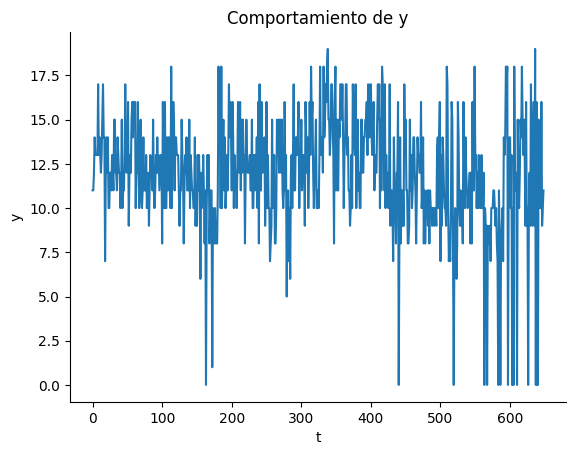

In [ ]:
t = np.arange(0, len(y), 1)
fig, ax = plt.subplots()
plt.plot(t,y)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Comportamiento de y')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)